In [7]:
import numpy as np
import os
import scipy.fft
import soundfile as sf
import matplotlib.pyplot as plt
import math
from colorama import Fore, Back, Style
import time

guitar_frequencies = {
    "E2": 82.41,
    "F2": 87.31,
    "F#2": 92.50,
    "G2": 98.00,
    "G#2": 103.83,
    "A2": 110.00,
    "A#2": 116.54,
    "B2": 123.47,
    "C3": 130.81,
    "C#3": 138.59,
    "D3": 146.83,
    "D#3": 155.56,
    "E3": 164.81,
    "F3": 174.61,
    "F#3": 185.00,
    "G3": 196.00,
    "G#3": 207.65,
    "A3": 220.00,
    "A#3": 233.08,
    "B3": 246.94,
    "C4": 261.63,
    "C#4": 277.18,
    "D4": 293.66,
    "D#4": 311.13,
    "E4": 329.63,
    "F4": 349.23,
    "F#4": 369.99,
    "G4": 392.00,
    "G#4": 415.30,
    "A4": 440.00,
    "A#4": 466.16,
    "B4": 493.88,
    "C5": 523.25,
    "C#5": 554.37,
    "D5": 587.33,
    "D#5": 622.25,
    "E5": 659.25,
    "F5": 698.46,
    "F#5": 739.99,
    "G5": 783.99,
    "G#5": 830.61,
    "A5": 880.00,
    "A#5": 932.33,
    "B5": 987.77,
    "C6": 1046.50,
    "C#6": 1108.73,
    "D6": 1174.66,
    "D#6": 1244.51,
    "E6": 1318.51
}

def frequency_to_note(freq):
    closest = None
    closest_diff = math.inf
    for note, f in guitar_frequencies.items():
        diff = abs(f - freq)
        if diff < closest_diff:
            closest_diff = diff
            closest = note
    return closest

def are_buckets_sorted(buckets):
    for i in range(len(buckets)-1):
        if buckets[i][1][0] > buckets[i+1][1][0]:
            return False
    return True


def get_expense(buckets, deletions):
    current_elements_needed_to_be_deleted = 0
    for index in deletions:
        for buck_idx, buck in buckets:
            if buck_idx == index:
                # print(" "*indent_depth, "Adding expense", len(buck[1]), "from bucket", buck)
                current_elements_needed_to_be_deleted += len(buck[1])
    return current_elements_needed_to_be_deleted

global _cache
_cache = {}
def cache(func):
    global _cache
    def wrapper(buckets):
        bucket_indecies = tuple([b[0] for b in buckets])
        if bucket_indecies in _cache:
            return _cache[bucket_indecies]
        result = func(buckets)
        _cache[bucket_indecies] = result
        return result
    return wrapper

@cache
def find_possible_deletions(buckets):
    if are_buckets_sorted(buckets):
        return []
    possible_deletions = {}
    for bucket_index, buck in buckets:
        new_buckets = [b for b in buckets if b[0] != bucket_index]
        current_deletions = [bucket_index]
        if not are_buckets_sorted(new_buckets):
            current_deletions += find_possible_deletions(new_buckets)
        expense = get_expense(buckets, current_deletions)
        if expense == 1:
            return current_deletions
        possible_deletions[expense] = current_deletions
        
            
    return possible_deletions[min(possible_deletions.keys())]


def elements_to_delete(arr, key = lambda x: x):
    global _cache
    buckets = []
    for i, e in enumerate(arr):
        k = key(e)
        if len(buckets) == 0:
            buckets.append([k, [e]])
        else:
            if buckets[-1][0] == k:
                buckets[-1][1].append(e)
            else:
                buckets.append([k, [e]])
   
    buckets = list(enumerate(buckets))
    print(len(buckets))

    bucket_deletions = find_possible_deletions(buckets)
    _cache = {}
    deletions = []
    for i, b in buckets:
        if i in bucket_deletions:
            for e in b[1]:
                deletions.append(e)

    return deletions




In [8]:
audios = {}
stringnames = []

for mp3 in os.listdir("."):
    if not "_string.mp3" in mp3:
        continue
    
    print(mp3)
    data, fs = sf.read(mp3)
    stringname = mp3.replace("_string.mp3", "")
    audios[stringname] = data
    if stringname not in stringnames:
        stringnames.append(stringname)

BUFSIZE = 8192
notes = [] ## string, data
for stringname, audio in audios.items():
    # get loudness over time of audio
    half_wavelength_for_50_hz = fs // 100
    loudness = []
    for i in range(0, len(audio), half_wavelength_for_50_hz):
        loudness.append(np.max(np.abs(audio[i:i+half_wavelength_for_50_hz])))

    new_note_indecies = []
    for i in range(1, len(loudness)):
        if 0.02 < loudness[i] > loudness[i-1] * 2.5:
            new_note_indecies.append(i)
    print(len(new_note_indecies))
    # plt.plot(audio, color="blue")
    # plt.plot(np.linspace(0, len(audio), len(loudness)), loudness, color="orange")
    # for note in new_note_indecies:
    #     plt.axvline(note*half_wavelength_for_50_hz, color="red")
    
    for index in new_note_indecies:
        notes.append((stringname, audio[index*half_wavelength_for_50_hz:index*half_wavelength_for_50_hz+BUFSIZE]))

stringnames = ["E", "A", "D", "G", "B", "h_E"]


A_string.mp3
B_string.mp3
D_string.mp3
E_string.mp3
G_string.mp3
h_E_string.mp3
151
142
149
153
145
146


A metric_1 = 0.0022623981705549457 metric_2 = -0.0023494752069200884 amplitude_ratio = 0.00011696796287155898 avg_deviation = 0.9956407278358498 real_base_freq = 110.357666015625
A metric_1 = 0.0023490556034565253 metric_2 = -0.0027654471999873785 amplitude_ratio = 0.00012812925996523274 avg_deviation = 0.9955435109906655 real_base_freq = 110.357666015625
A metric_1 = 0.002258142911917787 metric_2 = -0.003066724381707322 amplitude_ratio = 0.00011464042265378518 avg_deviation = 0.9956407278358498 real_base_freq = 110.357666015625
A metric_1 = 0.0022203785695306274 metric_2 = -0.0033170101204510567 amplitude_ratio = 0.00011474580099497463 avg_deviation = 0.9945476892822027 real_base_freq = 110.60236150568181
A metric_1 = 0.0023783936321771777 metric_2 = -0.002081447978305958 amplitude_ratio = 0.00010483646035094019 avg_deviation = 0.9955435109906655 real_base_freq = 110.357666015625
A metric_1 = 0.0022304157927264534 metric_2 = -0.0023655710362200265 amplitude_ratio = 0.00011147009685852

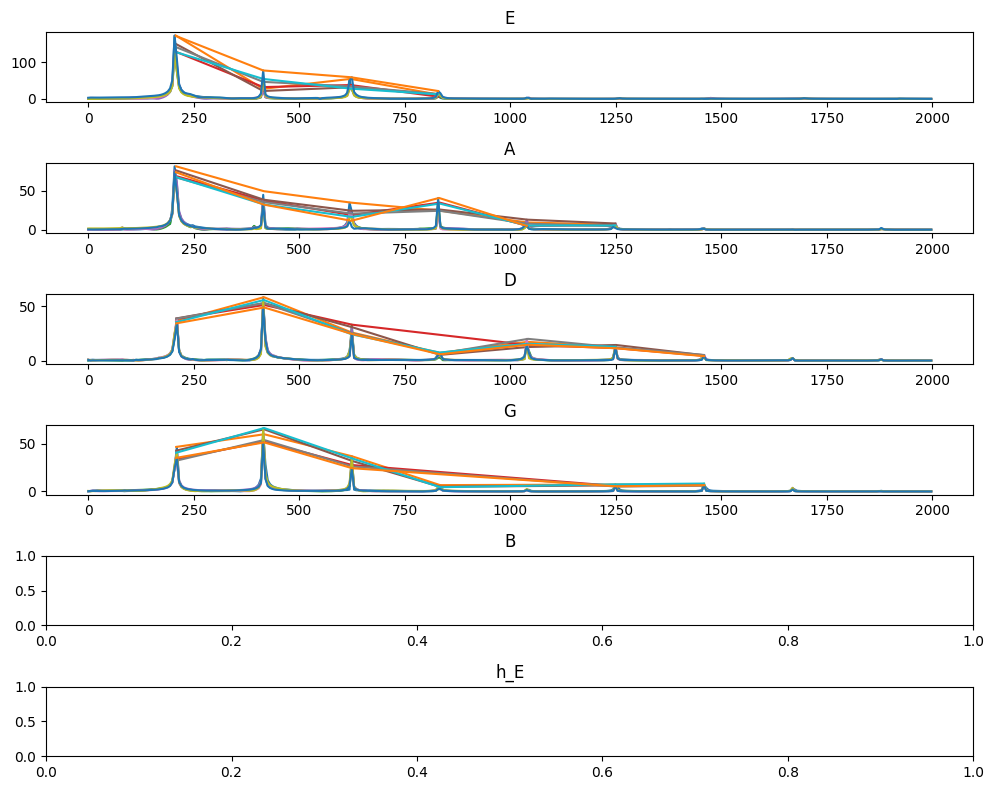

In [9]:

results = [] # metric, freq, clip_index, mp3

fig, axs = plt.subplots(len(stringnames), figsize=(10, 8))
for i, stringname in enumerate(stringnames):
    axs[i].set_title(stringname)

fig.tight_layout()
# fig.subplots_adjust(bottom=0.1, right=0.8, top=10)

for stringname, clip in notes:
    # Fourier transform
    fft_result = scipy.fft.fft(clip)
    magnitudes = np.abs(fft_result)
    frequencies = scipy.fft.fftfreq(len(clip), d=1/fs)  # Frequency in Hz
    positive_frequencies = frequencies[:len(clip) // 2]
    positive_magnitudes = magnitudes[:len(clip) // 2]
    limit_index = np.where(positive_frequencies <= 2000)[0]
    
    plot_frequencies = positive_frequencies[limit_index]
    plot_magnitudes = positive_magnitudes[limit_index]
    
    frequency_peaks = []
    amplitude_peaks = []

    
    for i in range(2, len(plot_magnitudes) - 2):
        if plot_magnitudes[i] > 4 and plot_magnitudes[i] > plot_magnitudes[i - 1] and plot_magnitudes[i] > plot_magnitudes[i + 1] and plot_magnitudes[i] > plot_magnitudes[i - 2] + plot_magnitudes[i + 2]:
            frequency_peaks.append(plot_frequencies[i])
            amplitude_peaks.append(plot_magnitudes[i])

    if len(amplitude_peaks) == 0:
        print(f"No peaks found for {stringname}")
        continue
    
    real_base_freq = frequency_peaks[0]
    overtone_amplitudes = {} # overtone index -> amplitude
    overtone_frequenices = {} # overtone index -> frequency
    for overtone_freq, amplitude in zip(frequency_peaks, amplitude_peaks):    
        base_to_overtone_factor = round(overtone_freq / real_base_freq)
        real_base_freq = overtone_freq / base_to_overtone_factor
        overtone_index = base_to_overtone_factor - 1
        if overtone_index not in overtone_amplitudes:
            overtone_amplitudes[overtone_index] = float(amplitude)
            overtone_frequenices[overtone_index] = [overtone_freq]
        else:
            overtone_amplitudes[overtone_index] += float(amplitude)
            overtone_frequenices[overtone_index].append(overtone_freq)
    
    overtone_frequenices = {i: sum(overtone_frequenices[i]) / len(overtone_frequenices[i]) for i in overtone_amplitudes.keys()}
    #metric
    amplitude_times_frequencies = []
    for a, f in zip(amplitude_peaks, frequency_peaks):
        amplitude_times_frequencies.append(a * f)
        
    metric_1 = 1/(sum(amplitude_times_frequencies) / sum(amplitude_peaks))
    amplitude_ratios = []


    metric_2 = overtone_amplitudes.get(0, 0) - overtone_amplitudes.get(1, 1)
    metric_2 *= .0001
    #print(f"Metrics: {metric_1 = }  {metric_2 = }")
    #amplitude ratio
    for amp in amplitude_peaks:
        amplitude_ratios.append(amp / amplitude_peaks[0])
    amplitude_ratio = sum(amplitude_ratios) / len(amplitude_ratios)
    amplitude_ratio *= .0001
    #  deviation 
    f0 = real_base_freq
    
    deviations = []
    for overtone_index, overtone_freq in overtone_frequenices.items():
        expected_freq = f0 * (overtone_index + 1)
        deviation = abs(overtone_freq / expected_freq)
        deviations.append(deviation)
    

    avg_deviation = sum(deviations) / len(deviations)
    print(f"{stringname} {metric_1 = } {metric_2 = } {amplitude_ratio = } {avg_deviation = } {real_base_freq = }")
    #avg_deviation *= .0001
    results.append((metric_1 + metric_2, amplitude_ratio,avg_deviation ,real_base_freq, stringname))

    ## TEMP
    if frequency_to_note(real_base_freq) == "G#3":
        string_index = list(stringnames).index(stringname)
        axs[string_index].plot(plot_frequencies, plot_magnitudes)
        # plot overtone amplitudes
        axs[string_index].plot((np.array(list(overtone_amplitudes.keys())) + 1) * real_base_freq, list(overtone_amplitudes.values()))

csv_text = ""
for metric, amp_ra, deviation,freq, stringname in results:
    csv_text += f"{stringname},{metric:.20f},{amp_ra:.20f},{deviation:.20f},{freq:.5f}\n"


with open("results.csv", "w") as f:
    f.write(csv_text)

In [10]:
results_with_notename = {}
for metric, amp,deviation,freq,stringname in results:
    note = frequency_to_note(freq)
    if note not in results_with_notename:
        results_with_notename[note] = [(metric, freq, stringname)]
    else:
        results_with_notename[note].append((metric, freq, stringname))

mistakes = []
starttime = time.time()
for notename in sorted(list(results_with_notename.keys()), key=lambda x: guitar_frequencies[x]):
    sorted_by_metric = sorted(results_with_notename[notename], key=lambda x: -x[0])
    print(f"({len(sorted_by_metric)} {sorted_by_metric} notes for {notename}:")
    notes_out_of_order = elements_to_delete(sorted_by_metric, key=lambda x: stringnames.index(x[2]))
    
    
    for metric, freq, stringname in sorted_by_metric:
        if (metric, freq, stringname) in notes_out_of_order:
            print(Fore.RED, end="")
        print(f"{stringname} ({notename}): {freq} Hz ({metric}){Fore.RESET}")

    for note in notes_out_of_order:
        mistakes.append(note)    
    
print(f"(Took {time.time() - starttime} seconds)\n")





print(f"Mistakes ({len(mistakes)} / {len(results)}):")

(8 [(0.0025588683595335485, 73.57177734375, 'A'), (0.002128013172890318, 83.19646661931819, 'E'), (0.001878457030808492, 82.90283203125, 'E'), (0.001536743722259059, 82.90283203125, 'E'), (0.0015172165481242353, 83.19646661931819, 'E'), (0.0013085564464917826, 83.19646661931819, 'E'), (0.0011034147167301252, 83.19646661931819, 'E'), (0.000606863335355342, 82.76824951171875, 'D')] notes for E2:
3
A (E2): 73.57177734375 Hz (0.0025588683595335485)
E (E2): 83.19646661931819 Hz (0.002128013172890318)
E (E2): 82.90283203125 Hz (0.001878457030808492)
E (E2): 82.90283203125 Hz (0.001536743722259059)
E (E2): 83.19646661931819 Hz (0.0015172165481242353)
E (E2): 83.19646661931819 Hz (0.0013085564464917826)
E (E2): 83.19646661931819 Hz (0.0011034147167301252)
D (E2): 82.76824951171875 Hz (0.000606863335355342)
(6 [(0.0026754354717789673, 87.92724609375, 'E'), (0.0025416796022804957, 87.92724609375, 'E'), (0.0023438377909466234, 87.4786376953125, 'E'), (0.002250967730129676, 87.92724609375, 'E'), (

KeyboardInterrupt: 